### UQ

Média: 4.2335887675757276
Desvio padrão: 2.041387171167347


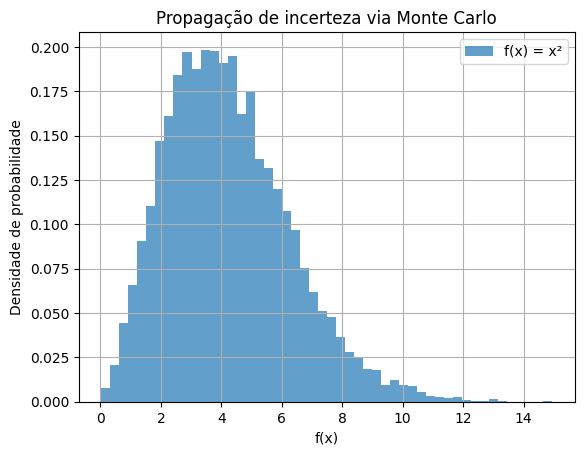

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Distribuição de entrada: x ~ N(2, 0.5^2)
N = 10000
x = np.random.normal(loc=2.0, scale=0.5, size=N)

# Modelo: f(x) = x^2
f_x = x**2

# Estatísticas
print("Média:", np.mean(f_x))
print("Desvio padrão:", np.std(f_x))

# Plot
plt.hist(f_x, bins=50, density=True, alpha=0.7, label='f(x) = x²')
plt.title("Propagação de incerteza via Monte Carlo")
plt.xlabel("f(x)")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid()
plt.show()


In [7]:
# !pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.5 MB/s eta 0:00:00a 0:00:01


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Carregar os dados
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Vamos usar apenas 2 features para simplificar
X = X[['MedInc', 'AveRooms','HouseAge']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Adiciona constante para o statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# 2. Treinar regressão quantílica para diferentes quantis
quantis = [0.1, 0.5, 0.9]
modelos = {}

for q in quantis:
    mod = sm.QuantReg(y_train, X_train_sm)
    res = mod.fit(q=q)
    modelos[q] = res
    print(f"Treinado modelo para quantil {q}")

# 3. Previsão para uma casa específica
idx = 0
x_input = X_test_sm.iloc[idx:idx+1]
true_value = y_test.iloc[idx]

print("\nPrevisão para uma casa:")
print(x_input)

for q in quantis:
    pred = modelos[q].predict(x_input).iloc[0]  # <- corrigido aqui
    print(f"Quantil {int(q*100)}%: R$ {pred*100_000:.2f}")


print(f"\nValor real da casa: R$ {true_value*100_000:.2f}")


Treinado modelo para quantil 0.1
Treinado modelo para quantil 0.5
Treinado modelo para quantil 0.9

Previsão para uma casa:
      const  MedInc  AveRooms  HouseAge
2699    1.0  1.8958  5.240664      35.0
Quantil 10%: R$ 54840.09
Quantil 50%: R$ 105350.60
Quantil 90%: R$ 233271.31

Valor real da casa: R$ 67500.00


In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
from sklearn.metrics import mean_squared_error

# Previsões do modelo de quantil 0.5 (mediana)
y_pred_mediana = modelos[0.5].predict(X_test_sm)

# Valor verdadeiro
y_true = y_test

# Calcular o MSE
mse = mean_squared_error(y_true, y_pred_mediana)

print(f"MSE do modelo (quantil 0.5): {mse:.4f}")


MSE do modelo (quantil 0.5): 0.6464


In [21]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred_mediana)

print(f"RMSE: {rmse:.4f} (em centenas de mil dólares)")
print(f"RMSE real: ${rmse * 100_000:,.2f}")


RMSE: 0.6464 (em centenas de mil dólares)
RMSE real: $64,644.99
